# Stats700-002 Homework 3, Fall 2017
### Zhen Qin
#### qinzhen@umich.edu

I did not discuss problems with anyone in the class. This file uses Python 2.7. I used WinSCP to copy files instead of scp command.

Problem 1 took me two hours; Problem 2 took me three hours; Problem 3 took me three hours.

### Problem 1: Warmup: counting words with mrjob

1.

Write an mrjob job called counting.py that takes text as input and counts how many times each word occurs in the text. As for marks, I only regard apostrophes as a part of words.

2.

Test the code on flux-hadoop server. After checking by hand, I think my code is behaving correctly.

3.

Run the mrjob job on the file.

4.

Make a plot of word frequency.

In [5]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

In [6]:
f = open('word_counts.txt','r')
lis=[]
for line in f:
    lis.append(line.split())
nlis = zip(*lis)[1]
nlis = np.array([int(i) for i in nlis])
plis = -np.sort(-nlis)

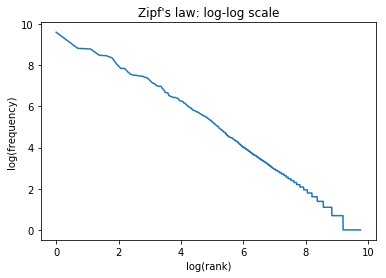

In [7]:
%matplotlib inline
y = np.log(plis)
x = np.log(np.arange(1,len(plis)+1))
plt.title('Zipf\'s law: log-log scale')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
_ = plt.plot(x,y)

5.

The resulting plot looks approximately like a line.

### Problem 2: Computing Sample Statistics with mrjob

1.

Write a mrjob program called mr_summary_stats.py. I use n in the denominator of the sample variance formula.

2.

Write the output to a file called summary_small.txt on flux-hadoop server. I inspect the program’s output and make sure that it is behaving as expected.

3.

Save the output to a file called summary_large.txt.

4.

Use matplotlib and the results in summary large.txt to create a plot displaying 95% confidence intervals for the sample means。

In [2]:
import matplotlib as mp
import matplotlib.pyplot as plt
import re
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [3]:
f = open('summary_large.txt')
regex = re.compile(r'([0-9]+)\s*\[(.*), (.*), (.*)\]')
large = []
pct = norm.ppf(0.975, loc = 0, scale = 1)
for line in f:
    m = re.search(regex, line)
    mlabel = float(m.group(1))
    mnum = float(m.group(2))
    mmean = float(m.group(3))
    mvar = float(m.group(4))
    mmse = pct * np.sqrt(mvar)/np.sqrt(mnum)
    tmp = [mlabel, mmean - mmse, mmean + mmse]
    large.append(tmp)
large = np.array(sorted(large))

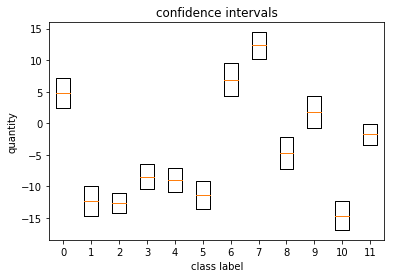

In [4]:
plt.title('confidence intervals')
plt.xlabel('class label')
plt.ylabel('quantity')
_ = plt.boxplot(list(large[:,1:3]), showcaps = False, whis = 0, showfliers = False,labels=list(np.int64(large[:,0])))

### Problem 3: Graph Processing: Counting Triangles with pySpark

1.

Write a PySpark job called triangle.py that takes the described input and produces a list of all the triangles in the network, one per line.

2.

Test the script on the set of 5 simple files in the HDFS directory. After checking by hand, I think my code is behaving correctly. There are 6 triangles.

3.

Run the script on the larger input.